# Prepare Validation Dataframe

In [50]:
import pandas as pd
import numpy as np 
import statistics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import modelling as ml
import pickle
import gzip, pickle, pickletools
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor


In [51]:
validation_df = pd.read_csv('../data/validation_modelling.csv')
validation_df.set_index('name', inplace=True)
validation_df.head()

,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,from_vivino,age,log_price,log_rating_qty,age^2,rating * log_rating_qty
name,,,,,,,,,,,,,,,,
Epicuro Appassimento 2017,172.0,10.0,30.0,3021.0,1.0,121.0,10.74,4.1,347.0,13.151740,1.0,7.0,2.373975,5.849325,49.0,23.982232
Domaines Astruc Merlot 2015,163.0,5.0,28.0,2827.0,3.0,53.0,6.46,3.2,44.0,12.190279,1.0,9.0,1.865629,3.784190,81.0,12.109407
Martin Codax Ergo Tempranillo Rioja 2018,178.0,18.0,31.0,4499.0,0.0,113.0,11.99,3.6,226.0,13.925762,1.0,6.0,2.484073,5.420535,36.0,19.513926
Jean Stodden Spatburgunder 2017,2.0,6.0,30.0,3787.0,2.0,121.0,13.45,3.5,110.0,12.841285,1.0,7.0,2.598979,4.700480,49.0,16.451681
Chateau Darmailhac Pauillac Grand Cru Classe 2015,162.0,5.0,28.0,1425.0,2.0,121.0,86.68,4.0,509.0,13.345748,1.0,9.0,4.462223,6.232448,81.0,24.929792


### Decison Tree Model

In [52]:
# Import price predictive model from 04 - decision tree model
filepath = '../models/casi_dt_production.pkl'
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    model = p.load()

In [53]:
# Test model on validation dataset 
X = validation_df.drop(columns = ['log_price', 'price', 'age', 'age^2', 'abv', 'from_vivino'])
y = validation_df['log_price']
log_price_pred  = model.predict(X)

mse = mean_squared_error(y, log_price_pred)

print(f"Price USD Root Mean Squared Error (RMSE): {round(np.exp(np.sqrt(mse)),3)}")
print(f"R-squared score: {round(r2_score(y, log_price_pred),3)}")

Price USD Root Mean Squared Error (RMSE): 1.347
R-squared score: 0.872


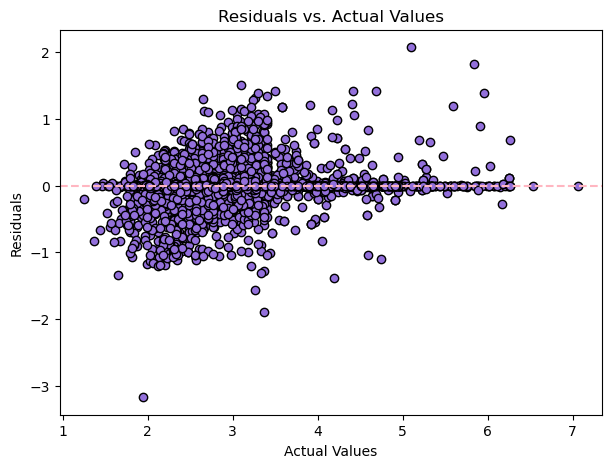

In [54]:
residuals = y - log_price_pred
plt.figure(figsize=(7, 5))
plt.scatter(y, residuals, color='mediumpurple', edgecolor='k')
plt.axhline(y=0, color='lightpink', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values');

### Random Forest Model

In [55]:
# Import price predictive model from 04 - decision tree model
filepath = '../models/casi_rf_production.pkl'
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    model_rf = p.load()

In [56]:
# Test model on validation dataset 

log_price_pred_rf  = model_rf.predict(X)

mse_rf = mean_squared_error(y, log_price_pred_rf)

print(f"Price USD Root Mean Squared Error (RMSE): {round(np.exp(np.sqrt(mse_rf)),3)}")
print(f"R-squared score: {round(r2_score(y, log_price_pred_rf),3)}")

Price USD Root Mean Squared Error (RMSE): 1.269
R-squared score: 0.918


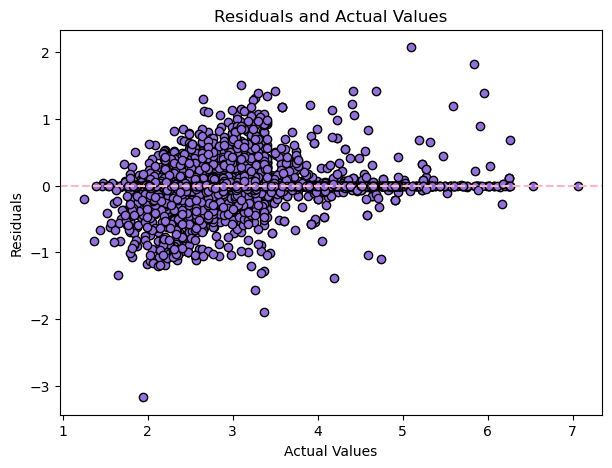

In [57]:
residuals_rf = y - log_price_pred_rf
plt.figure(figsize=(7, 5))
plt.scatter(y, residuals, color='mediumpurple', edgecolor='k')
plt.axhline(y=0, color='lightpink', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals and Actual Values');

# App Frontend Dataset

In [58]:
# # For comparison purpose 
# compare_frontend = pd.read_csv('../data/app_frontend.csv', index_col=0)
# compare_frontend

In [59]:
app_frontend = pd.read_csv('../data/validation_frontend.csv', index_col=0)

In [60]:
def to_normal_case(column_name):
    return ' '.join(word.capitalize() for word in column_name.split('_'))
app_frontend.columns = [to_normal_case(column) for column in app_frontend.columns]
app_frontend.rename(columns = {'Abv': 'ABV', 'Rating': 'Average Rating', 'Price' : 'Price (£)'}, inplace=True)

In [61]:
app_frontend.drop(columns = ['Reviewed By', 'From Vivino', 'Rating Qty', 'Log Rating Qty'], inplace=True)

In [62]:
# Reordering the last two columns
cols = app_frontend.columns.tolist()  # Get the list of all columns
cols[-2], cols[-1] = cols[-1], cols[-2]  # Swap the last two column names
app_frontend = app_frontend[cols]

In [63]:
print(app_frontend.columns)

Index(['Region', 'Country', 'Vintage', 'Producer', 'Wine Variety',
       'Grape Variety', 'Price (£)', 'Average Rating', 'ABV', 'Log Price',
       'Age'],
      dtype='object')


In [49]:
app_frontend['Wine Variety'] = app_frontend['Wine Variety'].apply(to_normal_case)
app_frontend['Average Rating'] = app_frontend['Average Rating'].apply(lambda x: round(float(x),2))
app_frontend.head()

,Region,Country,Vintage,Producer,Wine Variety,Grape Variety,Price (£),Average Rating,ABV,Log Price,Age
name,,,,,,,,,,,
Epicuro Appassimento 2017,Puglia,Italy,2017,Epicuro,Rose,Unknown,10.74,4.0,NaN,2.373975,7
Domaines Astruc Merlot 2015,Pays Doc,France,2015,Domaines Astruc,White,Merlot,6.46,3.0,NaN,1.865629,9
Martin Codax Ergo Tempranillo Rioja 2018,Rioja,Spain,2018,Martin Codax,Red,Tempranillo,11.99,4.0,NaN,2.484073,6
Jean Stodden Spatburgunder 2017,Ahr,Germany,2017,Jean Stodden,Sparkling,Unknown,13.45,4.0,NaN,2.598979,7
Chateau Darmailhac Pauillac Grand Cru Classe 2015,Pauillac,France,2015,Chateau Darmailhac,Sparkling,Unknown,86.68,4.0,NaN,4.462223,9


In [64]:
print(validation_df.shape)
print(app_frontend.shape)

(4333, 16)
(4333, 11)


In [65]:
validation_df.to_csv('../data/app_backend.csv', index=False)
app_frontend.to_csv('../data/app_frontend.csv', index=False)